In [35]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [36]:
# This file contains all the main external libs we'll use
import fastai
from fastai.imports import *

from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import skimage

In [37]:
PATH = "/scratch/kk4ze/data_lowres_2200x2200_augmented_duplicated/"
sz=2200

In [38]:
torch.cuda.is_available()

True

In [39]:
torch.backends.cudnn.enabled

True

In [40]:
os.listdir(PATH)

['models', 'tmp', 'valid', '.ipynb_checkpoints', 'train']

In [41]:
files = os.listdir(f'{PATH}valid/Celiac')[:5]
files

['C04-17_05_12764_7763_horiz__0_0.jpg',
 'C12-63_03_10776_11106_vert__1_0.jpg',
 'C07-37_06_8055_8580_vert__0_0.jpg',
 'C03-12_01_4376_5379_vert__1_0.jpg',
 'C06-33_02_8189_5011_horiz__0_0.jpg']

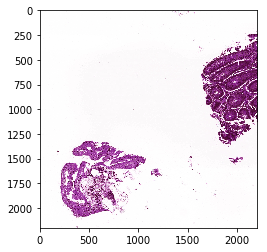

In [42]:
img = plt.imread(f'{PATH}valid/Celiac/{files[4]}')
plt.imshow(img);

In [68]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),bs=2)


In [69]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [72]:
learn.fit(0.0005, 200)

epoch      trn_loss   val_loss   accuracy                      
    0      0.675284   0.459092   0.82197   
    1      0.819149   0.437914   0.833333                      
    2      0.829177   0.421513   0.825758                      
    3      0.78014    0.456072   0.840909                      
    4      0.753419   0.557835   0.806818                      
    5      0.830275   0.457103   0.840909                      
    6      0.762763   0.476848   0.844697                      
    7      0.862655   2.133869   0.776515                      
    8      0.732852   0.448361   0.806818                     
    9      0.787956   0.441001   0.856061                      
    10     0.646855   0.450501   0.784091                      
    11     0.714353   0.448147   0.799242                      
    12     0.767209   0.464659   0.814394                      
    13     0.826375   0.488289   0.791667                      
    14     0.790969   0.482578   0.810606                    

   127     0.667482   0.454572   0.806818                      
   128     0.680482   0.41947    0.886364                      
   129     0.749844   0.454489   0.825758                      
   130     0.754839   0.423758   0.840909                      
   131     0.730486   0.415174   0.837121                      
   132     0.691599   0.504488   0.784091                      
   133     0.750769   0.446694   0.840909                      
   134     0.720041   0.4711     0.765152                      
   135     0.819181   0.480162   0.810606                      
   136     0.708315   0.464009   0.837121                      
   137     0.790724   0.478285   0.784091                      
   138     0.732246   0.518638   0.799242                      
   139     0.761974   0.453442   0.856061                      
   140     0.69729    0.459071   0.80303                       
   141     0.775963   0.443404   0.80303                       
   142     0.778562   0.439854   0.81060

KeyboardInterrupt: 

## Visualising Results

In [46]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
# from here we know that 'Celiac' is label 0 and 'EE' is label 1 and 'Normal' is label 2
data.classes

['Celiac', 'EE', 'Normal']

In [48]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(264, 3)

Most Correct Celiac


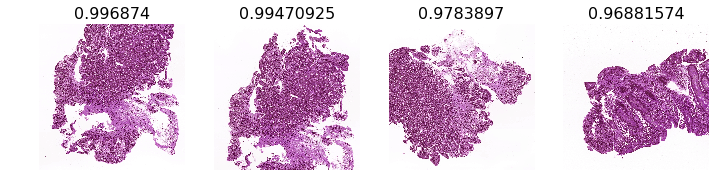

In [49]:
imr = ImageModelResults(data.val_ds, log_preds)
print('Most Correct Celiac')
imr.plot_most_correct(0)

Most Correct EE


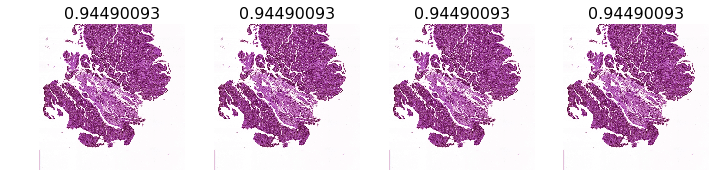

In [50]:
print('Most Correct EE')
imr.plot_most_correct(1)

Most Correct Normal


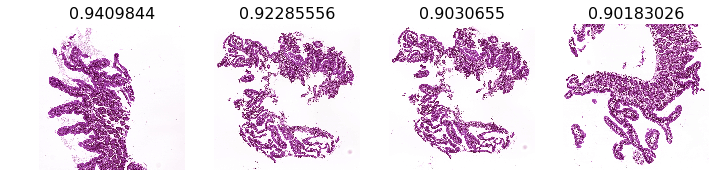

In [51]:
print('Most Correct Normal')
imr.plot_most_correct(2)

Most Incorrect Celiac


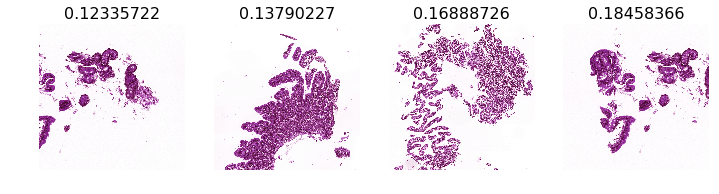

In [52]:
print('Most Incorrect Celiac')
imr.plot_most_incorrect(0)

Most Incorrect EE


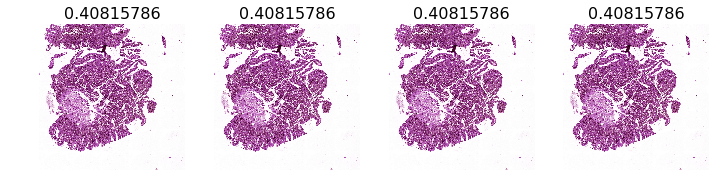

In [53]:
print('Most Incorrect EE')
imr.plot_most_incorrect(1)

Most Incorrect Normal


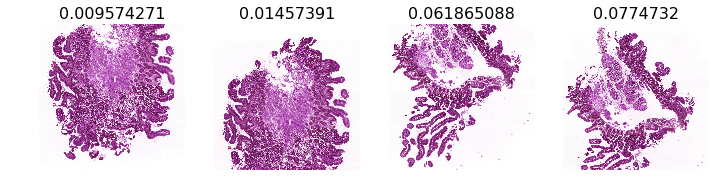

In [54]:
print('Most Incorrect Normal')
imr.plot_most_incorrect(2)

In [55]:
preds = np.argmax(log_preds, axis=1)

In [56]:
y = data.val_y

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[75  4 11]
 [ 0 90  6]
 [20  5 53]]


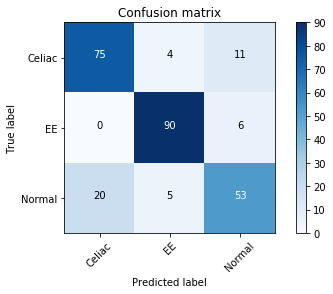

In [58]:
plot_confusion_matrix(cm, data.classes)

## Finding a optimum learning rate

In [59]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [60]:
lrf=learn.lr_find()

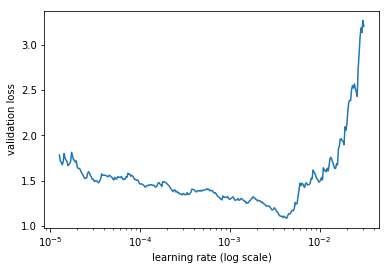

In [61]:
learn.sched.plot()

## Data Augmentation

In [73]:
# Using predefined augmentations transforms_top_down
tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

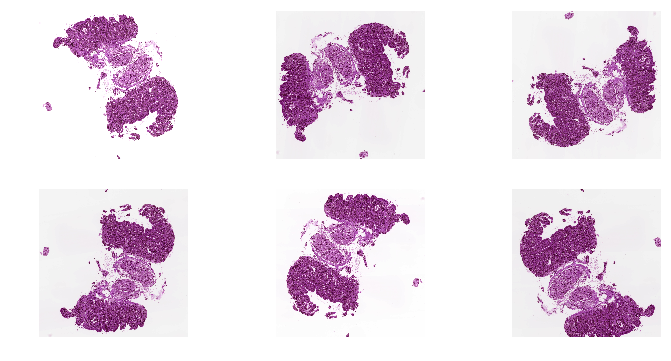

In [74]:
# Visualising the augmentation
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]
ims = np.stack([get_augs() for i in range(6)])
plots(ims, rows=2)

In [75]:
# Initializing the data with augmentation and learn method
data = ImageClassifierData.from_paths(PATH, tfms=tfms,bs=4)
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.precompute = False

In [65]:
lrf=learn.lr_find()

 68%|██████▊   | 196/287 [02:22<00:58,  1.55it/s, loss=4.25]

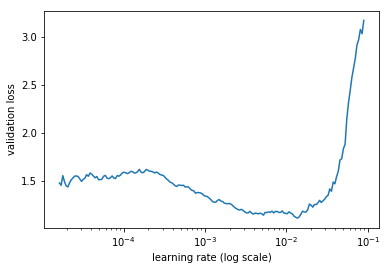

In [66]:
learn.sched.plot()

In [76]:
learn.fit(0.0005, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                     
    0      0.976293   0.748582   0.689394  
    1      0.758185   0.718238   0.738636                    
    2      0.654588   0.600559   0.757576                    
    3      0.695306   0.578788   0.772727                    
    4      0.720365   0.543121   0.787879                    
    5      0.648274   0.553814   0.810606                    
    6      0.691858   0.521523   0.810606                    
    7      0.64588    0.584074   0.731061                    
    8      0.680565   0.508844   0.814394                    
    9      0.686796   0.492933   0.82197                     
    10     0.585395   0.47366    0.829545                    
    11     0.625832   0.470455   0.82197                     
    12     0.645115   0.475051   0.82197                     
    13     0.62946    0.521846   0.776515                    
  1%|          | 3/287 [00:04<09:16,  1.96s/it, loss=0.619]

KeyboardInterrupt: 

In [43]:
learn.save('2200_lastlayer_duplicated_resnet34_lowres_staintools')

In [ ]:
learn.load('2200_lastlayer_duplicated_resnet34_lowres_staintools')

## Unfreezing layers and using Differential learning rates

In [14]:
# Unfreeze all layers for training
learn.unfreeze()

In [ ]:
lrf=learn.lr_find()

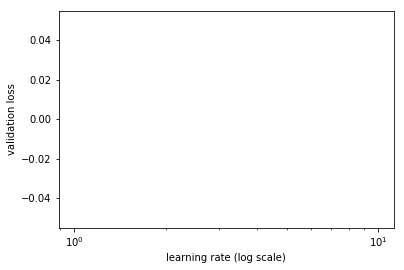

In [26]:
learn.sched.plot()

In [15]:
lr = (1e-2 + 1e-3)/2

In [16]:
lr=np.array([lr/9,lr/3,lr])

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [21]:
learn.save('2200_lowres_resnet34_staintools')

In [ ]:
learn.load('2200_lowres_resnet34_staintools')

## Analyzing results

### Confusion Matrix and Accuracy with Test Time Augmentation

In [22]:
# Getting log predictions with TTA
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.7989130434782609

In [23]:
log_preds.shape

(5, 184, 3)

In [ ]:
np.save('/scratch/kk4ze/data_lowres_augmented/logpreds_resnet50_all_layers256x256_duplicates_TTA_staintools.npy', log_preds)

In [42]:
log_preds = np.load('/scratch/kk4ze/data_lowres_augmented/logpreds_resnet50_all_layers256x256_duplicates_TTA_staintools.npy')

In [43]:
log_preds_mean = np.mean(log_preds, 0)

In [20]:
preds = np.argmax(probs, axis=1)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[53698   149  5089]
 [  591 51110    83]
 [ 6612    13 41039]]


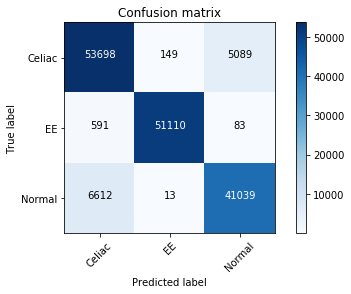

In [22]:
plot_confusion_matrix(cm, data.classes)

### Visualizing results with TTA

Most Correct Celiac


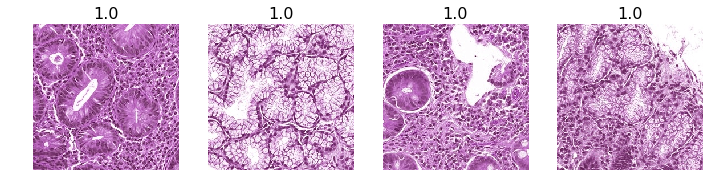

In [23]:
imr = ImageModelResults(data.val_ds, log_preds_mean)
print('Most Correct Celiac')
imr.plot_most_correct(0)

Most Correct EE


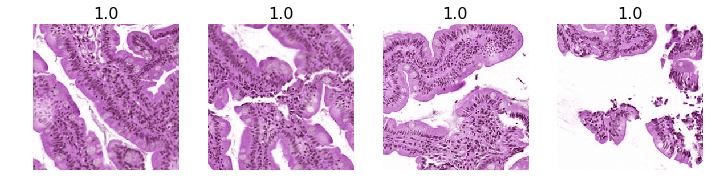

In [24]:
print('Most Correct EE')
imr.plot_most_correct(1)

Most Correct Noraml


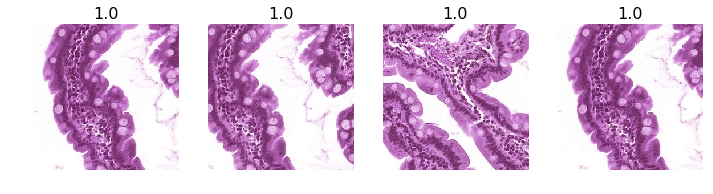

In [25]:
print('Most Correct Noraml')
imr.plot_most_correct(2)

Most Incorrect Celiac


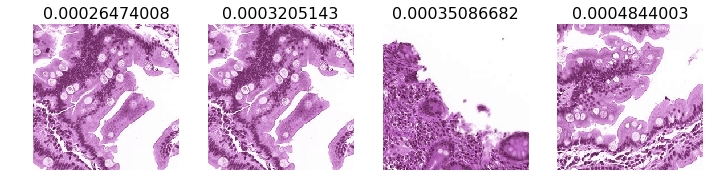

In [26]:
print('Most Incorrect Celiac')
imr.plot_most_incorrect(0)

Most Incorrect EE


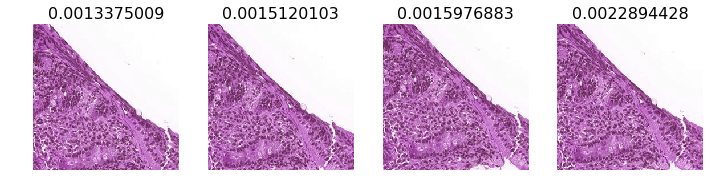

In [27]:
print('Most Incorrect EE')
imr.plot_most_incorrect(1)

Most Incorrect Normal


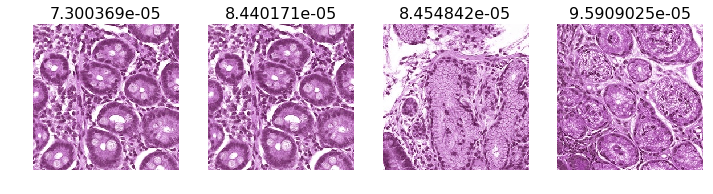

In [28]:
print('Most Incorrect Normal')
imr.plot_most_incorrect(2)

Most Uncertain Celiac


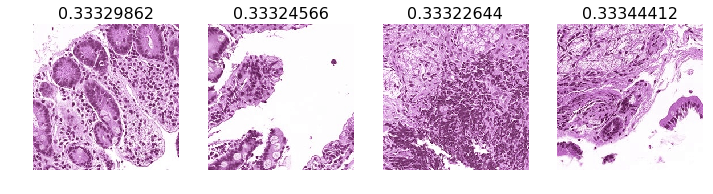

In [29]:
print('Most Uncertain Celiac')
imr.plot_most_uncertain(0)

Most Uncertain EE


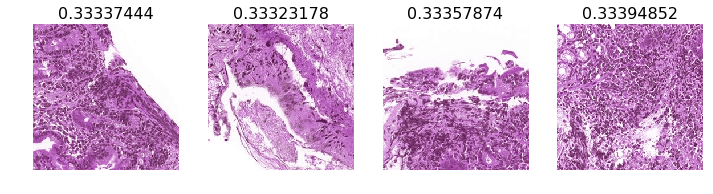

In [30]:
print('Most Uncertain EE')
imr.plot_most_uncertain(1)

Most Uncertain Normal


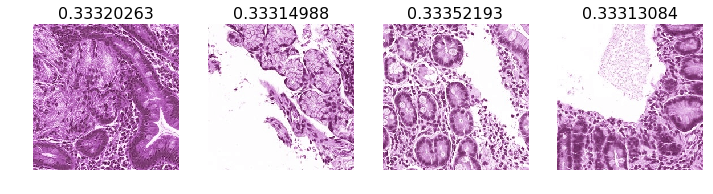

In [31]:
print('Most Uncertain Normal')
imr.plot_most_uncertain(2)

### Confusion Matrix and Accuracy without Test Time Augmentation

In [ ]:
# Getting log predictions without TTA
log_preds = learn.predict()

In [ ]:
preds = np.argmax(log_preds, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)

## Saving predictions of the model with TTA

In [45]:
np.exp(log_preds_mean)

array([[0.17136, 0.00017, 0.39814],
       [0.99999, 0.     , 0.     ],
       [0.99952, 0.00002, 0.00011],
       ...,
       [0.00143, 0.     , 0.99724],
       [0.03098, 0.00019, 0.91937],
       [0.1621 , 0.00007, 0.78512]], dtype=float32)

In [46]:
res = pd.DataFrame(np.exp(log_preds_mean))

In [47]:
res['file'] = data.val_ds.fnames

In [48]:
res.columns = ['Celiac', 'EE', 'Normal', 'FileName']

In [49]:
res.to_csv('../results/preds_resnet50_256_duplicates_TTA_staintools.csv')

In [50]:
res.head()

Celiac        EE    Normal                                 FileName
0  0.171363  0.000166  0.398144    valid/Celiac/C16-77_02_3330_999_1.jpg
1  0.999991  0.000002  0.000004   valid/Celiac/C06-27_02_5994_4662_0.jpg
2  0.999517  0.000018  0.000107   valid/Celiac/C06-28_02_13653_666_1.jpg
3  0.999978  0.000009  0.000002  valid/Celiac/C06-28_02_13320_1332_1.jpg
4  0.999983  0.000009  0.000004   valid/Celiac/C06-32_02_5994_2664_0.jpg